## **Machine Learning API using FastAPI**

## **Introduction**

In this project, we aim to help you to discover how to create an API that might be requested to interact with a ML model. This is an interesting solution when you want to keep your model architecture secret or to make your model available to users already having an API. By creating an API, and deploying it, your model can so that receive request using the internet protocol as presented by the illustration below.

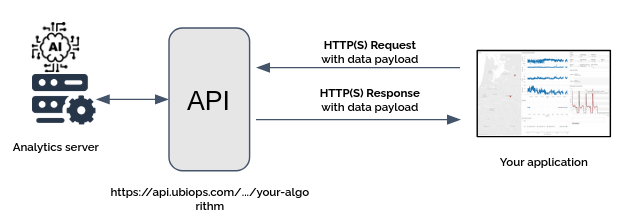

Source : The benefits of Machine Learning APIs - UbiOps

## **Project Description**

As we embark on our project journey, our first step will be to construct a minimal API demo utilizing FastAPI. This preliminary phase is crucial for ensuring that all components are correctly configured and operating as intended.

Following the successful setup of the demo, our focus will shift to crafting our own API tailored to interact seamlessly with a Machine Learning model. This bespoke API will facilitate the following workflow:

1. Receiving data through API requests from our clients.
2. Collaboratively processing the received data to prepare it for ingestion into the Machine Learning model.
3. Transmitting the preprocessed data to the Machine Learning model for prediction.
4. Coordinating the handling of predictions generated by the model.
5. Orchestrating the delivery of processed predictions as the API's response to our clients' initial requests.
By collectively implementing this comprehensive process, our API will empower users to harness the capabilities of Machine Learning, thereby enabling them to access valuable insights and predictions derived from their input data.






 ## **The Hypothesis**

 ### **Null Hypothesis:** 
The mean Plasma glucose level (PRG) is not significantly different between patients who develop sepsis during their ICU stay and those who do not.

### **Alternative Hypothesis:**
The mean Plasma glucose level (PRG) is significantly different between patients who develop sepsis during their ICU stay and those who do not.


## **The Analytical Questions**

1. What is the average Plasma glucose level (PRG) among patients who develop sepsis compared to those who do not?
2. Are there any significant differences in Blood Pressure (PR), Body mass index (M11), or age between patients who develop sepsis and those who do not?
3. Is there a correlation between insurance status and the likelihood of developing sepsis during an ICU stay?
4. Can Machine Learning models accurately predict the development of sepsis based on the provided variables?
5. What are the most important predictors of sepsis development among the variables examined?
6. How does the presence of valid insurance coverage impact the risk of sepsis among ICU patients?
7. Are there any interactions or nonlinear relationships between the variables and the likelihood of sepsis development?
8. How does the prevalence of sepsis vary across different age groups and insurance statuses?
9. Are there any specific thresholds or cutoff values for variables such as Plasma glucose (PRG) or Body mass index (M11) that are associated with an increased risk of sepsis?
10. How can the insights gained from analyzing these variables be used to improve early detection and prevention strategies for sepsis in ICU settings?






##  **Data Understanding**

1. ID: number to represent patient ID
2. PRG: Plasma glucose
3. PL: Blood Work Result-1 (mu U/ml)
4. PR: Blood Pressure (mm Hg)
5. SK: Blood Work Result-2 (mm)
6. TS: Blood Work Result-3 (mu U/ml)
7. M11: Body mass index (weight in kg/(height in m)^2
8. BD2: Blood Work Result-4 (mu U/ml)
9. Age: patients age (years)
10. Insurance: If a patient holds a valid insurance card
11. Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwis

## 1. Importing the relevant libraries and modules

In [2]:
import pyodbc
import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, RobustScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from numpy import log1p
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import joblib
import os 

# 2. Loading data Paitients_Files_Test and train

In [5]:
df_Paitients_Files_Test= pd.read_csv('Dataset/Paitients_Files_Test.csv')
# Display the first few rows of the DataFrame
df_Paitients_Files_Test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [6]:
df_Paitients_Files_Train= pd.read_csv('Dataset/Paitients_Files_Train.csv')
# Display the first few rows of the DataFrame
df_Paitients_Files_Train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [7]:
#info of Paitients_Files_Test
df_Paitients_Files_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [8]:
#info of Paitients_Files_Test
df_Paitients_Files_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [9]:
df_Paitients_Files_Test.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

In [10]:
df_Paitients_Files_Train.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [11]:
# Check the number of columns and rows in each data
df_Paitients_Files_Test.shape, df_Paitients_Files_Train.shape

((169, 10), (599, 11))

In [12]:
# Check for duplicated rows if any in the first 169 data points
df_Paitients_Files_Test.duplicated().sum()

0

In [13]:
# Check for duplicated rows if any in the first 599 data points
df_Paitients_Files_Train.duplicated().sum()

0

In [14]:
# check unique values for the first 169 dataFrame
unique_values_per_column = df_Paitients_Files_Test.apply(pd.unique)
print(unique_values_per_column)

ID           [ICU200609, ICU200610, ICU200611, ICU200612, I...
PRG             [1, 6, 7, 4, 0, 3, 11, 2, 9, 5, 10, 13, 8, 12]
PL           [109, 108, 96, 124, 150, 183, 181, 92, 152, 11...
PR           [38, 88, 0, 74, 78, 60, 62, 82, 54, 58, 80, 72...
SK           [18, 19, 0, 36, 29, 32, 42, 25, 39, 13, 21, 22...
TS           [120, 0, 126, 293, 41, 272, 182, 158, 194, 321...
M11          [23.1, 27.1, 23.7, 27.8, 35.2, 28.4, 35.8, 40....
BD2          [0.407, 0.4, 0.19, 0.1, 0.692, 0.212, 0.514, 1...
Age          [26, 24, 28, 30, 54, 36, 21, 22, 25, 27, 23, 4...
Insurance                                               [1, 0]
dtype: object


In [15]:
# check unique values for the first 599 dataFrame
unique_values_per_column = df_Paitients_Files_Train.apply(pd.unique)
print(unique_values_per_column)

ID           [ICU200010, ICU200011, ICU200012, ICU200013, I...
PRG          [6, 1, 8, 0, 5, 3, 10, 2, 4, 7, 9, 11, 13, 15,...
PL           [148, 85, 183, 89, 137, 116, 78, 115, 197, 125...
PR           [72, 66, 64, 40, 74, 50, 0, 70, 96, 92, 80, 60...
SK           [35, 29, 0, 23, 32, 45, 19, 47, 38, 30, 41, 33...
TS           [0, 94, 168, 88, 543, 846, 175, 230, 83, 96, 2...
M11          [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35....
BD2          [0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2...
Age          [50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 5...
Insurance                                               [0, 1]
Sepssis                                   [Positive, Negative]
dtype: object


In [16]:
# Display summary statistics for df_Paitients_Files_Test dataset
df_Paitients_Files_Test.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,70.426036,20.443787,81.000000,32.249704,0.438876,33.065089,0.727811
std,3.402415,29.259123,19.426805,15.764962,110.720852,7.444886,0.306935,11.548110,0.446410
min,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,27.600000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


In [17]:
# Display summary statistics for df_Paitients_Files_Train dataset
df_Paitients_Files_Train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
# Check for missing values in columns
df_Paitients_Files_Test.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [19]:
# Check for missing values in columns
df_Paitients_Files_Train.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

### <b> 3. Exploratory Data Analysis

### <b> Univariate Data analysis

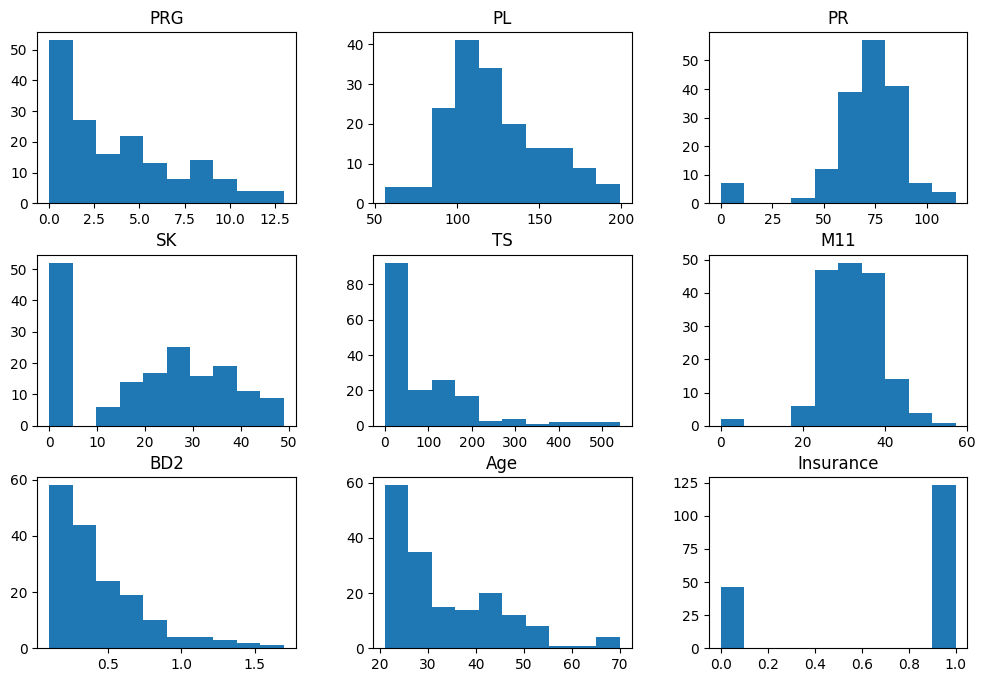

In [20]:
# Visualizing the distribution of Numerical Variables
df_Paitients_Files_Test.hist(figsize=(12,8), grid= False)
plt.show()

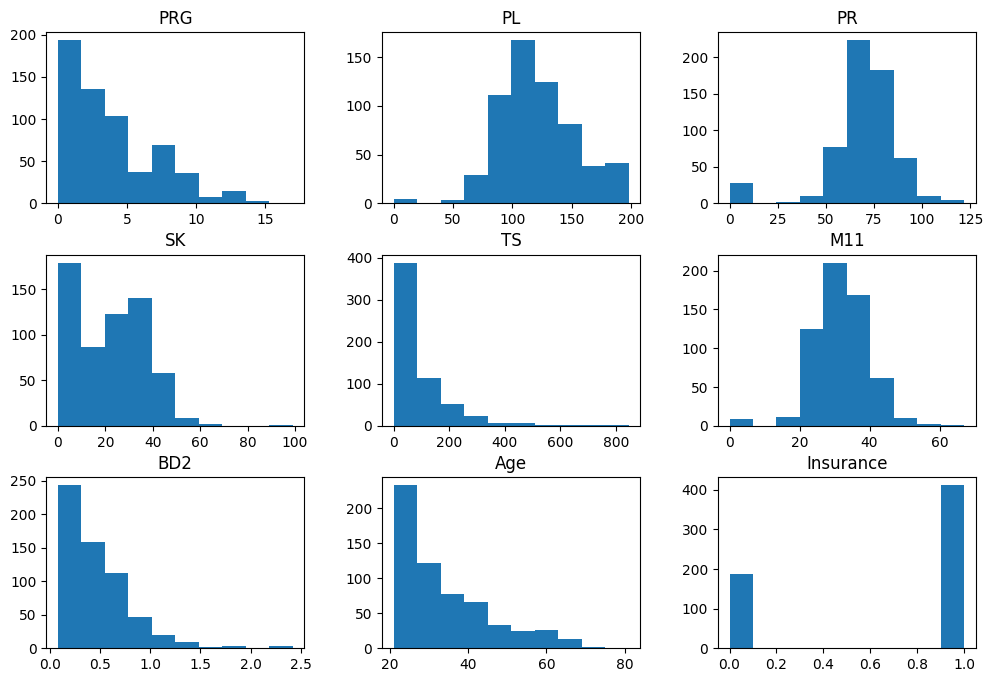

In [21]:
# Visualizing the distribution of Numerical Variables
df_Paitients_Files_Train.hist(figsize=(12,8), grid= False)
plt.show()

1. PRG (Plasma glucose): The distribution appears right-skewed, with more data points concentrated towards lower values and a longer tail extending towards higher glucose levels.
2. PR (Blood Pressure): It seems to have a somewhat normal distribution, with a peak around the center and data points tapering off on either side.
3. SK (Blood Work Result-2): This histogram is difficult to interpret due to the uneven binning (unequal bin sizes).
4. TS (Blood Work Result-3): Similar to SK, the uneven binning makes it hard to discern the distribution.
5. M11 (Body mass index): The distribution leans slightly to the right, with more patients having a normal BMI and a fewer on the higher or lower ends.
6. BD2 (Blood Work Result-4): Similar to SK and TS, the interpretation is hindered by the uneven binning.
7. Age: The distribution is right-skewed, with most patients concentrated in younger age groups and a fewer in older age groups.